In [1]:
# Download dependencies here
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [36]:
# Libraries
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
pd.set_option('display.max_columns', None)  

In [21]:
# Importing dataset
df = pd.read_csv('../datasets/Student_Performance_Metrics_Dataset/ResearchInformation3.csv')

In [22]:
df.head()

,Department,Gender,HSC,SSC,Income,Hometown,Computer,Preparation,Gaming,Attendance,Job,English,Extra,Semester,Last,Overall
0,Business Administration,Male,4.17,4.84,"Low (Below 15,000)",Village,3,More than 3 Hours,0-1 Hour,80%-100%,No,3,Yes,6th,3.220,3.350
1,Business Administration,Female,4.92,5.00,"Upper middle (30,000-50,000)",City,3,0-1 Hour,0-1 Hour,80%-100%,No,3,Yes,7th,3.467,3.467
2,Business Administration,Male,5.00,4.83,"Lower middle (15,000-30,000)",Village,3,0-1 Hour,More than 3 Hours,80%-100%,No,4,Yes,3rd,4.000,3.720
3,Business Administration,Male,4.00,4.50,"High (Above 50,000)",City,5,More than 3 Hours,More than 3 Hours,80%-100%,No,5,Yes,4th,3.800,3.750
4,Business Administration,Female,2.19,3.17,"Lower middle (15,000-30,000)",Village,3,0-1 Hour,2-3 Hours,80%-100%,No,3,Yes,4th,3.940,3.940


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493 entries, 0 to 492
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Department   493 non-null    object 
 1   Gender       493 non-null    object 
 2   HSC          493 non-null    float64
 3   SSC          493 non-null    float64
 4   Income       493 non-null    object 
 5   Hometown     493 non-null    object 
 6   Computer     493 non-null    int64  
 7   Preparation  493 non-null    object 
 8   Gaming       493 non-null    object 
 9   Attendance   493 non-null    object 
 10  Job          493 non-null    object 
 11  English      493 non-null    int64  
 12  Extra        493 non-null    object 
 13  Semester     493 non-null    object 
 14  Last         493 non-null    float64
 15  Overall      493 non-null    float64
dtypes: float64(4), int64(2), object(10)
memory usage: 61.8+ KB


In [24]:
encoder = OneHotEncoder(sparse_output=False)

encoded_columns = encoder.fit_transform(df[['Department']])

df_encoded = pd.DataFrame(
    encoded_columns,
    columns = encoder.get_feature_names_out(['Department'])
)

df = pd.concat([df, df_encoded], axis=1).drop('Department', axis=1)

In [25]:
encoder = OneHotEncoder(sparse_output=False)

encoded_columns = encoder.fit_transform(df[['Gender']])

df_encoded = pd.DataFrame(
    encoded_columns,
    columns = encoder.get_feature_names_out(['Gender'])
)

df = pd.concat([df, df_encoded], axis=1).drop('Gender', axis=1)

In [26]:
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [27]:
ordinal_encoder = OrdinalEncoder(categories = [['Low (Below 15,000)', 'Lower middle (15,000-30,000)', 'Upper middle (30,000-50,000)', 'High (Above 50,000)']])
df['Income']= ordinal_encoder.fit_transform(df[['Income']])

In [28]:
ordinal_encoder = OrdinalEncoder(categories = [['Village', 'City']])
df['Hometown']= ordinal_encoder.fit_transform(df[['Hometown']])

In [29]:
ordinal_encoder = OrdinalEncoder(categories = [['0-1 Hour', '2-3 Hours', 'More than 3 Hours']])
df['Preparation']= ordinal_encoder.fit_transform(df[['Preparation']])
df['Gaming']= ordinal_encoder.fit_transform(df[['Gaming']])

In [30]:
ordinal_encoder = OrdinalEncoder(categories = [['Below 40%', '40%-59%', '60%-79%', '80%-100%']])
df['Attendance']= ordinal_encoder.fit_transform(df[['Attendance']])

In [31]:
ordinal_encoder = OrdinalEncoder(categories = [['2nd', '3rd', '4th', '5th', '6th', '7th', '8th', '9th', '10th', '11th', '12th']])
df['Semester']= ordinal_encoder.fit_transform(df[['Semester']])

In [32]:
ordinal_encoder = OrdinalEncoder(categories = [['No', 'Yes']])
df['Job']= ordinal_encoder.fit_transform(df[['Job']])

In [33]:
ordinal_encoder = OrdinalEncoder(categories = [['No', 'Yes']])
df['Extra']= ordinal_encoder.fit_transform(df[['Extra']])

In [34]:
df.head(5)

,HSC,SSC,Income,Hometown,Computer,Preparation,Gaming,Attendance,Job,English,Extra,Semester,Last,Overall,Department_Business Administration,Department_Computer Science and Engineering,Department_Economics,Department_Electrical and Electronic Engineering,Department_English,"Department_Journalism, Communication and Media Studies",Department_Law and Human Rights,Department_Political Science,Department_Public Health,Department_Sociology,Gender_Female,Gender_Male
0,4.17,4.84,0.0,0.0,3,2.0,0.0,3.0,0.0,3,1.0,4.0,3.220,3.350,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,4.92,5.00,2.0,1.0,3,0.0,0.0,3.0,0.0,3,1.0,5.0,3.467,3.467,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,5.00,4.83,1.0,0.0,3,0.0,2.0,3.0,0.0,4,1.0,1.0,4.000,3.720,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4.00,4.50,3.0,1.0,5,2.0,2.0,3.0,0.0,5,1.0,2.0,3.800,3.750,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2.19,3.17,1.0,0.0,3,0.0,1.0,3.0,0.0,3,1.0,2.0,3.940,3.940,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


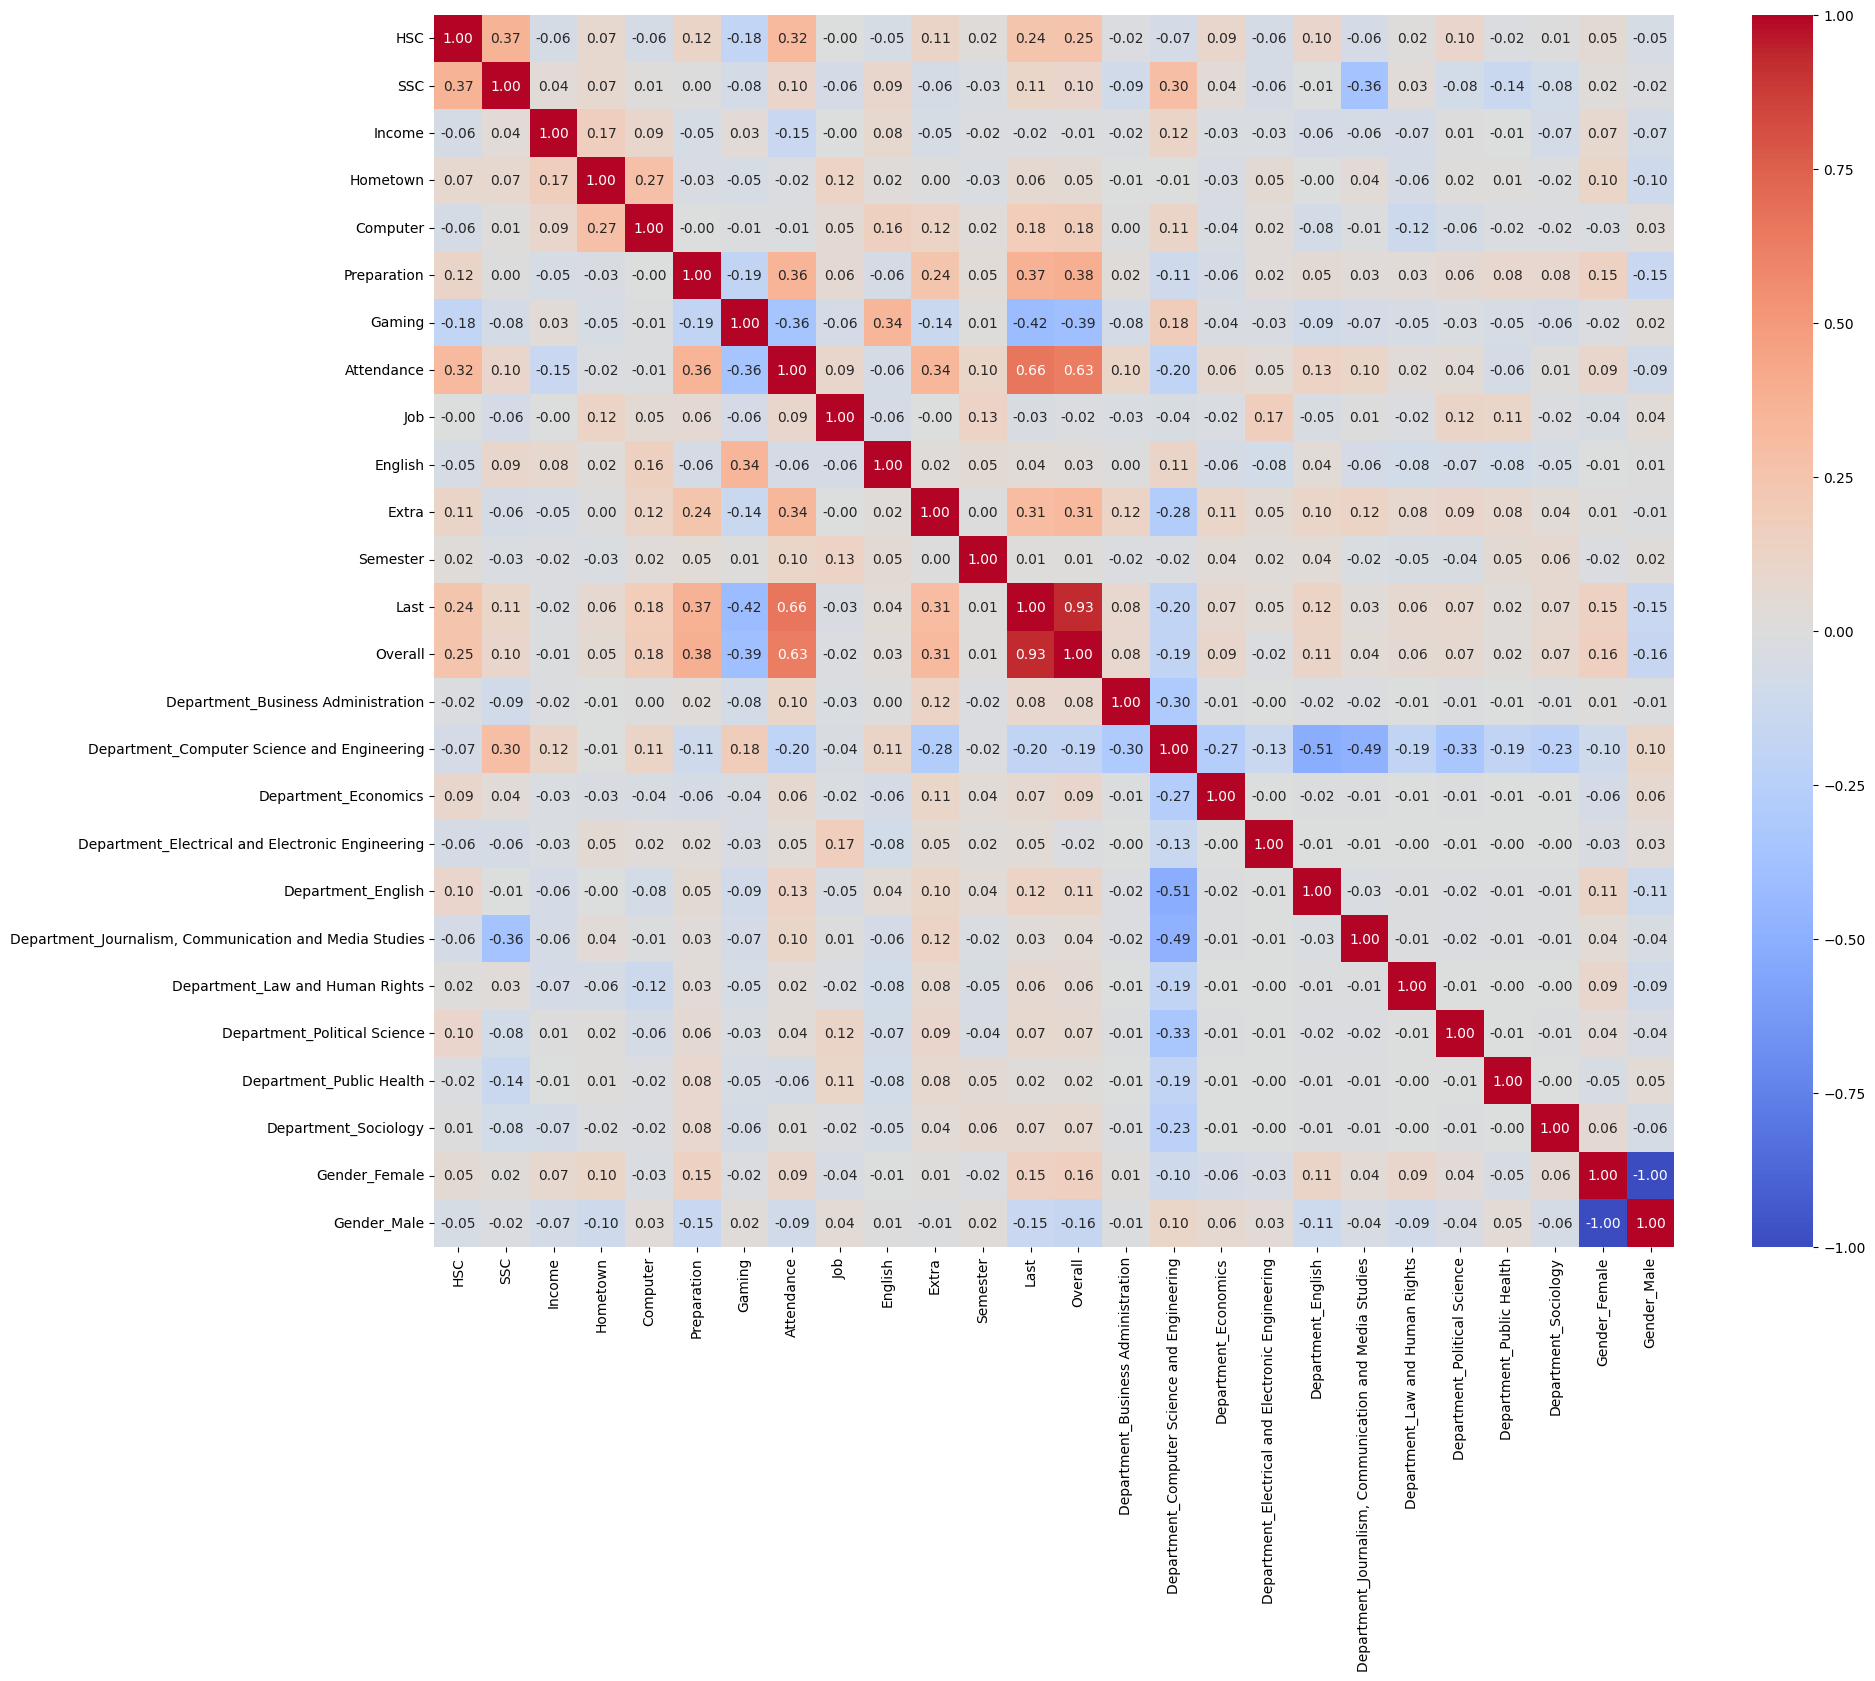

In [45]:
correlation_matrix = df.corr()

plt.figure(figsize = (20,16))
sns.heatmap(correlation_matrix, cmap = 'coolwarm', annot=True, fmt=".2f")
plt.show()

In [ ]:
%store df